In [1]:
from halotools.sim_manager import CachedHaloCatalog
from halotools.empirical_models import PrebuiltHodModelFactory
import numpy as np
from matplotlib import pyplot as plt
from halotools.mock_observables import hod_from_mock

# Build models and make mocks
## Use prebuilt model provided by halotools

In [86]:
zheng07_model = PrebuiltHodModelFactory('zheng07', threshold = -19.5, redshift = 0.5)

In [87]:
zheng07_model.param_dict

{'logMmin': 11.75,
 'sigma_logM': 0.28,
 'logM0': 11.69,
 'logM1': 13.01,
 'alpha': 1.06}

In [54]:
zheng07_model.param_dict['logMmin'] = 12.5

In [56]:
halocat = CachedHaloCatalog(simname = 'bolshoi', redshift = 0.5)

In [57]:
halos = halocat.halo_table

In [58]:
print(halos[0:9])

halo_vmax_firstacc halo_dmvir_dt_tdyn ... halo_hostid halo_mvir_host_halo
------------------ ------------------ ... ----------- -------------------
            917.78             6630.0 ...  1805589089   117300000000000.0
            100.65              280.6 ...  1805589089   117300000000000.0
              91.4             -3.247 ...  1805589089   117300000000000.0
             63.53              1.725 ...  1805589089   117300000000000.0
            264.93             -57.76 ...  1805589089   117300000000000.0
             87.28            -0.4211 ...  1805589089   117300000000000.0
             92.93             -2.533 ...  1805589460       27670000000.0
             84.96             -1.642 ...  1805589089   117300000000000.0
            121.69             -3.265 ...  1805589089   117300000000000.0


In [59]:
print(halos.keys())

['halo_vmax_firstacc', 'halo_dmvir_dt_tdyn', 'halo_macc', 'halo_scale_factor', 'halo_vmax_mpeak', 'halo_m_pe_behroozi', 'halo_xoff', 'halo_spin', 'halo_scale_factor_firstacc', 'halo_c_to_a', 'halo_mvir_firstacc', 'halo_scale_factor_last_mm', 'halo_scale_factor_mpeak', 'halo_pid', 'halo_m500c', 'halo_id', 'halo_halfmass_scale_factor', 'halo_upid', 'halo_t_by_u', 'halo_rvir', 'halo_vpeak', 'halo_dmvir_dt_100myr', 'halo_mpeak', 'halo_m_pe_diemer', 'halo_jx', 'halo_jy', 'halo_jz', 'halo_m2500c', 'halo_mvir', 'halo_voff', 'halo_axisA_z', 'halo_axisA_x', 'halo_axisA_y', 'halo_y', 'halo_b_to_a', 'halo_x', 'halo_z', 'halo_m200b', 'halo_vacc', 'halo_scale_factor_lastacc', 'halo_vmax', 'halo_m200c', 'halo_vx', 'halo_vy', 'halo_vz', 'halo_dmvir_dt_inst', 'halo_rs', 'halo_nfw_conc', 'halo_hostid', 'halo_mvir_host_halo']


In [60]:
halos['halo_pid', 'halo_upid', 'halo_hostid', 'halo_z', 'halo_vz']

halo_pid,halo_upid,halo_hostid,halo_z,halo_vz
int64,int64,int64,float32,float32
-1,-1,1805589089,18.18657,-119.05
1805589089,1805589089,1805589089,18.20386,-38.88
1805589198,1805589089,1805589089,18.06294,262.81
1805590461,1805589089,1805589089,17.87904,-382.43
1805589089,1805589089,1805589089,18.35121,61.77
1805589089,1805589089,1805589089,18.4579,-532.1
-1,-1,1805589460,17.52933,97.16
1805589089,1805589089,1805589089,18.20446,-629.8
1805589089,1805589089,1805589089,18.12643,-346.33


In [61]:
halos['halo_hostid'][halos['halo_pid']==1805590461	] # halo pid doesn't point to a specific upid or host id

1805589089
1805589089


In [62]:
zheng07_model.populate_mock(halocat)

In [63]:
galaxies = zheng07_model.mock.galaxy_table

In [64]:
len(galaxies), len(halos)

(40710, 1420182)

In [65]:
print(galaxies[0:9])

halo_upid halo_rvir  halo_vy  halo_y  ...    vz      x     host_centric_distance
--------- ---------- ------- -------- ... ------- -------- ---------------------
       -1  1.1571131  -11.95 43.13491 ... -119.05 35.73223                   0.0
       -1   1.105502  490.94 47.97213 ... -152.86 45.00907                   0.0
       -1  1.0630109  144.48 13.35399 ...  -69.74 21.62638                   0.0
       -1 0.90204996  161.45 13.84255 ... -124.57 26.80523                   0.0
       -1   0.929493  267.63 28.60934 ...   202.1  0.71409                   0.0
       -1 0.92395097  212.12 25.34845 ... -216.25 10.51264                   0.0
       -1   0.820718    92.3  36.3899 ... -435.21 12.90159                   0.0
       -1   0.924992  171.66  6.15593 ...  -94.42  46.9032                   0.0
       -1   0.866734  267.07 23.39546 ... -539.47 15.02275                   0.0


In [66]:
print(galaxies.keys())

['halo_upid', 'halo_rvir', 'halo_vy', 'halo_y', 'conc_NFWmodel', 'halo_x', 'halo_mvir', 'halo_z', 'halo_vz', 'halo_id', 'halo_hostid', 'halo_vx', 'halo_num_centrals', 'halo_num_satellites', 'gal_type', 'z', 'y', 'vx', 'vy', 'vz', 'x', 'host_centric_distance']


In [67]:
galaxies['halo_id', 'halo_hostid', 'halo_mvir', 'halo_upid', 'halo_num_centrals', 'halo_num_satellites', 'halo_z', 'halo_vz', 'gal_type', 'z', 'vz']

halo_id,halo_hostid,halo_mvir,halo_upid,halo_num_centrals,halo_num_satellites,halo_z,halo_vz,gal_type,z,vz
int64,int64,float32,int64,int32,int32,float32,float32,object,float32,float32
1805589089,1805589089,117300000000000.0,-1,1,17,18.18657,-119.05,centrals,18.18657,-119.05
1805604915,1805604915,102300000000000.0,-1,1,8,40.30439,-152.86,centrals,40.30439,-152.86
1803484120,1803484120,90970000000000.0,-1,1,11,9.67113,-69.74,centrals,9.67113,-69.74
1803485520,1803485520,55590000000000.0,-1,1,10,5.36992,-124.57,centrals,5.36992,-124.57
1803497704,1803497704,60820000000000.0,-1,1,6,16.9269,202.1,centrals,16.9269,202.1
1803511225,1803511225,59740000000000.0,-1,1,5,23.38622,-216.25,centrals,23.38622,-216.25
1803756359,1803756359,41870000000000.0,-1,1,3,35.39057,-435.21,centrals,35.39057,-435.21
1805383224,1805383224,59940000000000.0,-1,1,5,41.96936,-94.42,centrals,41.96936,-94.42
1803527194,1803527194,49310000000000.0,-1,1,7,40.50043,-539.47,centrals,40.50043,-539.47


In [68]:
len(galaxies), len(halos[halos['halo_upid']==-1]) # so not every central halo gets a galaxy

(40710, 1064633)

In [69]:
np.max(galaxies['gal_type'][galaxies['x']!=galaxies['halo_x']]=='centrals') # only centrals have matching halo and galaxy positions and velocities

False

In [70]:
galaxies[galaxies['halo_hostid']==1818294159] # halo_num_centrals and halo_num_satellites tells you number of centrals and halos in the host

halo_upid,halo_rvir,halo_vy,halo_y,conc_NFWmodel,halo_x,halo_mvir,halo_z,halo_vz,halo_id,halo_hostid,halo_vx,halo_num_centrals,halo_num_satellites,gal_type,z,y,vx,vy,vz,x,host_centric_distance
int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,float32,int32,int32,object,float32,float32,float32,float32,float32,float32,float64


### Sanity check by plotting HOD

In [71]:
halo_mass = np.logspace(11, 15, 100)

In [72]:
mean_ncen = zheng07_model.mean_occupation_centrals(prim_haloprop = halo_mass)
mean_nsat = zheng07_model.mean_occupation_satellites(prim_haloprop = halo_mass)

In [73]:
galaxies[galaxies['halo_hostid']==1805589089]

halo_upid,halo_rvir,halo_vy,halo_y,conc_NFWmodel,halo_x,halo_mvir,halo_z,halo_vz,halo_id,halo_hostid,halo_vx,halo_num_centrals,halo_num_satellites,gal_type,z,y,vx,vy,vz,x,host_centric_distance
int64,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,float32,int32,int32,object,float32,float32,float32,float32,float32,float32,float64
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,centrals,18.18657,43.13491,1.78,-11.95,-119.05,35.73223,0.0
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.501947,42.428764,605.58234,760.9647,140.10521,35.207447,0.9346145244581914
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.112608,43.366016,94.93426,-376.16263,-242.09369,34.936172,0.8322216742689195
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.083735,42.94343,-654.09625,520.1941,-293.91846,35.80465,0.22909402418743186
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.611034,43.31576,241.30017,186.9321,-362.22174,35.620575,0.4747053108885516
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.928734,43.76807,-388.92807,760.79834,-30.202364,35.27629,1.076838386176688
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,17.83619,42.30154,-218.74768,64.93341,276.34738,35.507217,0.9316125178934255
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.090141,43.198475,-11.72509,78.456505,-59.117443,35.88027,0.1877593985516916
-1,1.1571131,-11.95,43.13491,7.580469,35.73223,117300000000000.0,18.18657,-119.05,1805589089,1805589089,1.78,1,17,satellites,18.208378,43.03955,-695.9151,703.4736,-295.34265,35.810818,0.12547762420788733


In [74]:
def hod(galaxies_unique, halo_mass, linestyle = '--'):
    
    ind = np.digitize(galaxies_unique['halo_mvir'], halo_mass) # bin the halo masses
    mean_ncen_mock = [np.sum(galaxies_unique['halo_num_centrals'][ind == i])/len(galaxies_unique['halo_num_centrals'][ind == i]) for i in range(len(halo_mass))]
    mean_nsat_mock = [np.sum(galaxies_unique['halo_num_satellites'][ind == i])/len(galaxies_unique['halo_num_satellites'][ind == i]) for i in range(len(halo_mass))]
    
    plt.plot(halo_mass, mean_ncen_mock, label = 'centrals, mock', linestyle = linestyle)
    plt.plot(halo_mass, mean_nsat_mock, label = 'satellites, mock', linestyle = linestyle)
    plt.plot(halo_mass, np.add(mean_ncen_mock, mean_nsat_mock), label = 'total, mock', linestyle = linestyle)
    
    return mean_ncen_mock, mean_nsat_mock

In [75]:
unique_hostid, hostid_ind = np.unique(galaxies['halo_hostid'], return_index = True)

In [76]:
halos_unique = zheng07_model.mock.halo_table

In [77]:
# follow tutorial: https://halotools.readthedocs.io/en/latest/api/halotools.mock_observables.hod_from_mock.html
# this is more accurate than previous method because you're includig the halos that have no galaxies vs all have centrals
cenmask = galaxies['gal_type'] == 'centrals'
central_host_mass = galaxies['halo_mvir'][cenmask]
halo_masses = halos_unique['halo_mvir']
haloprop_bins = np.logspace(11, 15, 15)
mean_ncen_hod, bin_edges = hod_from_mock(central_host_mass, halo_masses, halo_mass)

In [78]:
satmask = galaxies['gal_type'] == 'satellites'
satellite_host_mass = galaxies['halo_mvir'][satmask]
mean_nsat_hod, bin_edges = hod_from_mock(satellite_host_mass, halo_masses, halo_mass)

In [79]:
def recenter(bins):
    return 0.5*(bins[1:]+bins[:-1])

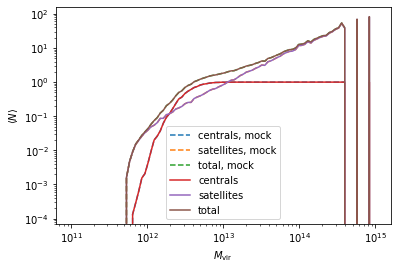

In [80]:
# plt.plot(halo_mass, mean_ncen, label = 'centrals')
# plt.plot(halo_mass, mean_nsat, label = 'satellites')
# plt.plot(halo_mass, mean_ncen+mean_nsat, label = 'total')
# mean_ncen_mock, mean_nsat_mock = hod(galaxies[hostid_ind], halo_mass)
mean_ncen_mock_unique, mean_nsat_mock_unique = hod(halos_unique, halo_mass) 
# plt.plot(halo_mass, mean_ncen_mock, label = 'centrals, mock', linestyle = '--')
# plt.plot(halo_mass, mean_nsat_mock, label = 'satellites, mock', linestyle = '--')
# plt.plot(halo_mass, np.add(mean_ncen_mock,mean_nsat_mock), label = 'total, mock', linestyle = '--')
plt.plot(halo_mass[1:], mean_ncen_hod, label = 'centrals')
plt.plot(halo_mass[1:], mean_nsat_hod, label = 'satellites')
plt.plot(halo_mass[1:], mean_ncen_hod+mean_nsat_hod, label = 'total')
plt.xlabel('$M_\mathrm{vir}$')
plt.ylabel(r'$\langle N \rangle$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Measure the median clustering signal from a prebuilt mock

In [81]:
r, xi_cc, xi_cs, xi_ss = zheng07_model.compute_average_galaxy_clustering(gal_type = 'centrals', include_crosscorr = True, num_iterations = 3, num_threads = 'max')

In [82]:
r, xi_cc_auto = zheng07_model.compute_average_galaxy_clustering(gal_type = 'centrals', include_crosscorr = False, num_iterations = 3, num_threads = 'max')

In [83]:
r, xi_ss_auto = zheng07_model.compute_average_galaxy_clustering(gal_type = 'satellites', include_crosscorr = False, num_iterations = 3, num_threads = 'max')

In [84]:
r, xi = zheng07_model.compute_average_galaxy_clustering(include_crosscorr = False, num_iterations = 3, num_threads = 'max')

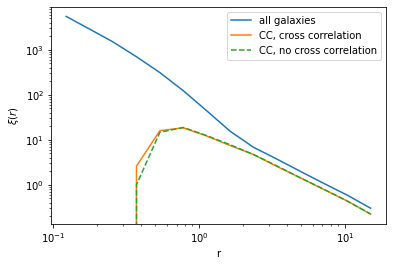

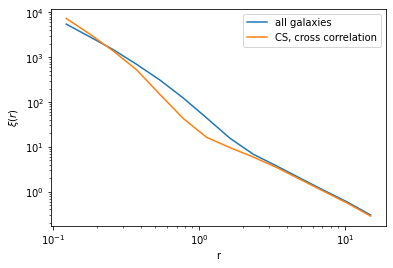

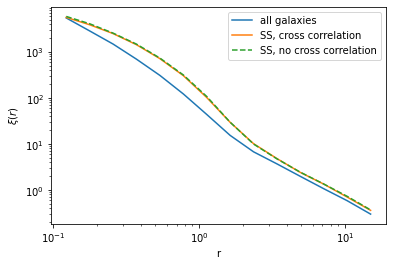

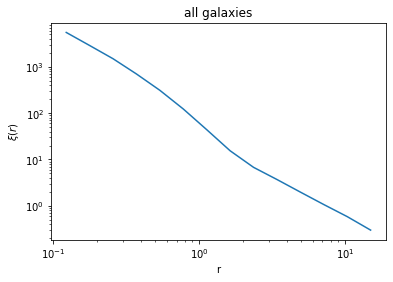

In [85]:
plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_cc_auto, label = 'CC, cross correlation')
plt.plot(r, xi_cc, label = 'CC, no cross correlation', linestyle = '--')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_cs, label = 'CS, cross correlation')
plt.legend()
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(r, xi, label = 'all galaxies')
plt.plot(r, xi_ss_auto, label = 'SS, cross correlation')
plt.plot(r, xi_ss, label = 'SS, no cross correlation', linestyle = '--')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(r, xi)
plt.title('all galaxies')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Questions
- halo_pid points to any specific subhalo? or it just tells you it's a sub-subhalo?
- halo_id vs halo_hostid for galaxies?
- halo_x vs x for galaxies? halo_vx vs vx? just host halo vs central galaxy?
- do i need to design my own galaxy-halo model?
- will I use halo_tools clustering or corrfunc clustering? 
    - compute_average_galaxy_clustering shouldn't be used in MCMC, and wp function doesn't work on observable data... how do you use halotools with corrfunc?
- confused about bin edges?